# Modules import

In [1]:
!pip install skimpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.2/117.2 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 47.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.2/34.2 MB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 51.2 MB/s eta 0:00:00
  Attempting uninstall: polars
    Found existing installation: polars 1.14.0
    Uninstalling polars-1.14.0:
      Successfully uninstalled polars-1.14.0
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled p

In [2]:
!pip install --upgrade numpy scikit-learn

**Restart kernel before importing**

In [57]:
# to import dataset
from sklearn.datasets import load_diabetes

# to load dataset
import pandas as pd

# to describe df
from skimpy import skim

import numpy as np

# to viz
import seaborn as sns
import matplotlib.pyplot as plt

# to compute correlation
from sklearn.feature_selection import mutual_info_regression

# to scale features
from sklearn.preprocessing import StandardScaler

# feature selection
from sklearn.linear_model import LassoCV

# for model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# for model export
import pickle

# 1) Dataset loading

In [2]:
diabetes = load_diabetes(scaled=False)

In [3]:
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)

In [4]:
df['target'] = diabetes.target

# 2) EDA

In [5]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ Dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 442    │ │ float64     │ 11    │                                                          │
│ │ Number of columns │ 11     │ └─────────────┴───────┘                                                          │
│ └───────────────────┴────────┘                                                                                  │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column    ┃ NA   ┃ NA %   ┃ mean    ┃ sd        ┃ p0      ┃ p25     ┃ p50     ┃ p75     ┃ p100   ┃ hist    ┃  │
│ ┡━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━┩  │
│ │ age       │    0 │      0 │   48.52 │     13.11 │      19 │   38.25 │      50 │      59 │     79 │ ▂▅▆█▆▁  │  │
│ │ sex       │    0 │      0 │   1.468 │    0.4996 │       1 │       1 │       1 │       2 │      2 │ █    ▇  │  │
│ │ bmi       │    0 │      0 │   26.38 │     4.418 │      18 │    23.2 │    25.7 │   29.27 │   42.2 │  ▃█▅▃▁  │  │
│ │ bp        │    0 │      0 │   94.65 │     13.83 │      62 │      84 │      93 │     105 │    133 │ ▁▆█▅▄▁  │  │
│ │ s1        │    0 │      0 │   189.1 │     34.61 │      97 │   164.2 │     186 │   209.8 │    301 │ ▁▄█▅▂▁  │  │
│ │ s2        │    0 │      0 │   115.4 │     30.41 │    41.6 │   96.05 │     113 │   134.5 │  242.4 │  ▂██▃▁  │  │
│ │ s3        │    0 │      0 │   49.79 │     12.93 │      22 │   40.25 │      48 │   57.75 │     99 │  ▂█▇▃▁  │  │
│ │ s4        │    0 │      0 │    4.07 │      1.29 │       2 │       3 │       4 │       5 │   9.09 │  █▆▄▂▁  │  │
│ │ s5        │    0 │      0 │   4.641 │    0.5224 │   3.258 │   4.277 │    4.62 │   4.997 │  6.107 │ ▁▅█▇▃▁  │  │
│ │ s6        │    0 │      0 │   91.26 │      11.5 │      58 │   83.25 │      91 │      98 │    124 │  ▃▆█▃▁  │  │
│ │ target    │    0 │      0 │   152.1 │     77.09 │      25 │      87 │   140.5 │   211.5 │    346 │ ▇█▇▅▄▁  │  │
│ └───────────┴──────┴────────┴─────────┴───────────┴─────────┴─────────┴─────────┴─────────┴────────┴─────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

Key takeaways:
- All columns are float64, including sex → **sex needs encoding**
- No NaN values → **No imputation needed**
- s4 does not seem to follow a normal distribution → This may affect the model. A power transformation (e.g., Yeo-Johnson) could help if skewness is high.

## Correlations between numerical features and target (numerical)

In [10]:
# Pearson: for linear correlation
correlation_matrix = df.corr()

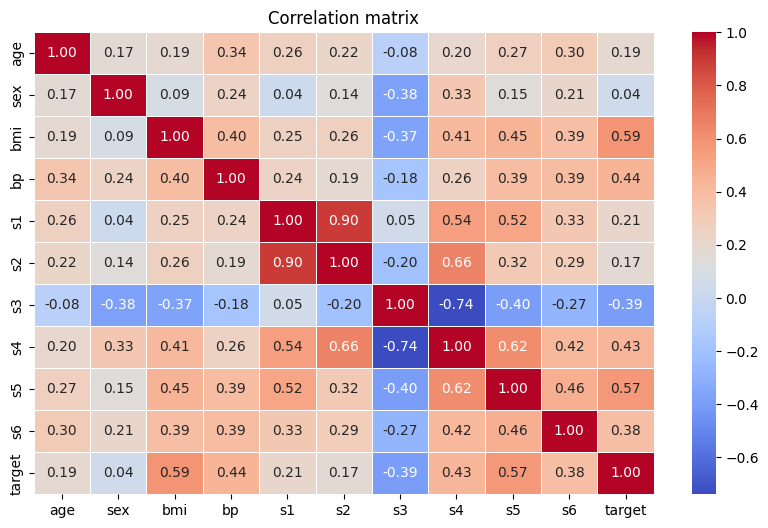

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation matrix")
plt.show()

In [15]:
# Mutual information: for non linear correlation
mi_scores = mutual_info_regression(df.drop(columns=['target']), df['target'])
mi_series = pd.Series(mi_scores, index=df.drop(columns=['target']).columns).sort_values(ascending=False)

print("\nMutual Information Feature-Target:\n", mi_series)


Mutual Information Feature-Target:
 bmi    0.172195
s5     0.143843
s4     0.116888
s6     0.112832
s3     0.071818
bp     0.067974
s1     0.066398
sex    0.040553
s2     0.015041
age    0.013147
dtype: float64


The project description states that `bmi`, `bp`, and `s5` could have a significant influence on diabetes progression.

However, **our analysis suggests that `s4` could also be an important predictor**, as it shows a notable correlation with the target (0.43) and ranks third in Mutual Information, ahead of `bp` and `s1`.

Additionally, **`s6` presents a similar level of importance**, indicating that it may also contribute to the model’s predictive power.

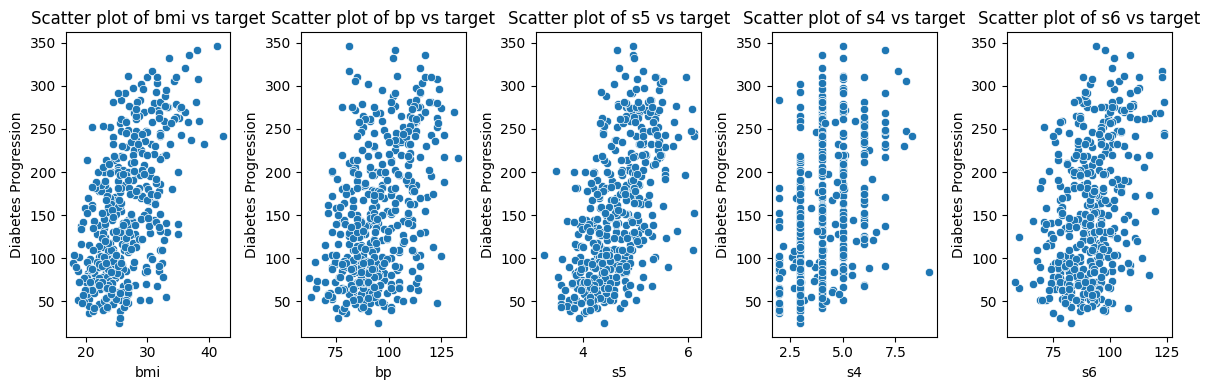

In [22]:
# scatterplots
# tried to add s4 to project description features

important_features = ['bmi', 'bp', 's5', 's4', 's6']

plt.figure(figsize=(12, 4))
for i, feature in enumerate(important_features, 1):
    plt.subplot(1, 5, i)
    sns.scatterplot(x=df[feature], y=df['target'])
    plt.xlabel(feature)
    plt.ylabel("Diabetes Progression")
    plt.title(f"Scatter plot of {feature} vs target")

plt.tight_layout()
plt.show()

Although our initial analysis suggested that `s4` could be an important predictor, **the scatter plot reveals that its values are distributed in discrete clusters** rather than following a continuous trend. Unlike `bmi`, `bp`, and `s5`, which show clear linear relationships with diabetes progression, `s4` does not exhibit a meaningful pattern, making it less suitable for a linear regression model. Therefore, **we decided to exclude `s4` from the final feature selection**.

We'll se if the model need `s6` too.

## Correlations between categorical features and target (numerical)

In [24]:
# Mutual information because sex is binary
mi_sex = mutual_info_regression(df[['sex']], df['target'])
print(f"Mutual Information between 'sex' and target: {mi_sex[0]:.5f}")

Mutual Information between 'sex' and target: 0.04368


Mutual Information score (0.04368) indicates that it provides almost no predictive value for diabetes progression.

# 3) Cleansing and pre-processing

While we won't consider sex for the model, we encode it as required

In [26]:
df['sex'] = df['sex'] - 1  # Convert 1→0 e 2→1

In [28]:
df = df.drop(columns=['sex'])

In [31]:
# Separate features from target
X = df.drop(columns=['target'])
y = df['target']

# Standardize features
scaler_X = StandardScaler()
X_scaled = pd.DataFrame(scaler_X.fit_transform(X), columns=X.columns)

# Reconstruct df (X standardize, original y)
df_scaled = X_scaled.copy()
df_scaled['target'] = y

We decided not to standardize the target variable because we are using a linear regression model, which does not require the target to be scaled. Keeping the target in its original scale ensures that the model’s predictions remain interpretable and directly comparable to real-world values. Standardization is generally more beneficial for models that rely on gradient-based optimization, such as neural networks.

# 4) Feature selection

In [35]:
# Find best (λ)
lasso = LassoCV(cv=5, random_state=42).fit(X_scaled, y)

# Features coeffs
lasso_coefficients = pd.Series(lasso.coef_, index=X_scaled.columns)

print("Lasso Feature Coefficients:")
print(lasso_coefficients)

Lasso Feature Coefficients:
age    -0.000000
bmi    26.233967
bp     12.000461
s1     -5.230625
s2     -0.000000
s3     -6.726287
s4      0.000000
s5     25.327906
s6      1.546466
dtype: float64


**The original project description was correct** in identifying `bmi`, `bp`, and `s5` as the most influential factors in diabetes progression. Our Lasso regression results confirm their strong predictive power.

**Additionally, our hypothesis about `s4` was also validated, as Lasso assigned it a coefficient of zero**, indicating that it does not contribute significantly to the model.

In [ ]:
# Select only features with non zero coefficient
selected_features = lasso_coefficients[lasso_coefficients != 0].index.tolist()

print("\nSelected Features:", selected_features)

# New df
X_selected = X_scaled[selected_features]

# 5-6) Modelling

## Baseline

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error (MSE): 2955.6650
R² Score: 0.4421


## Final model

**Given** that:
- our heatmap revealed **collinearity** between certain features
- our dataset is quite small

**we decided to go for Ridge Regression**.

In [51]:
alphas = [0.1, 1, 10, 100, 1000]

# Try each alpha in the list on 5 cross val fold for every model
ridge = RidgeCV(alphas=alphas, cv=5, scoring='r2')
ridge.fit(X_train, y_train)

y_pred_ridge = ridge.predict(X_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"Ridge Regression - Best Alpha: {ridge.alpha_}")
print(f"Ridge Regression - Mean Squared Error (MSE): {mse_ridge:.4f}")
print(f"Ridge Regression - R² Score: {r2_ridge:.4f}")

Ridge Regression - Best Alpha: 10.0
Ridge Regression - Mean Squared Error (MSE): 2941.3008
Ridge Regression - R² Score: 0.4448


**Last try**


(per lasciare il notebook abbastanza pulito ho preferito omettere tutti i tentativi che ho fatto, tra cui Random Forest Regressor, anche se ho letto non funzionare bene su dataset di piccole dimensioni - infatti performava peggio della baseline, così come gli altri che ho testato)

In [56]:
# Create polinomial feature (only interactions, no squared terms to avoid overfitting)
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Try each alpha in the list on 5 cross val fold for every model
ridge_poly = RidgeCV(alphas=[0.1, 1, 10, 100, 1000], cv=5, scoring='r2')
ridge_poly.fit(X_train_poly, y_train)

y_pred_poly = ridge_poly.predict(X_test_poly)

mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f"Polynomial Ridge Regression - Mean Squared Error (MSE): {mse_poly:.4f}")
print(f"Polynomial Ridge Regression - R² Score: {r2_poly:.4f}")

Polynomial Ridge Regression - Mean Squared Error (MSE): 2906.5470
Polynomial Ridge Regression - R² Score: 0.4514


## Consideration on the final model

Despite testing multiple models, the model performance remains suboptimal. **The issue likely does not stem from the choice of model but rather from data-related factors**. Several key aspects could be contributing to this:

- Limited dataset size (443 samples)
- High variance in target values
- Potential measurement noise
- Possible non-linear relationships that require alternative modeling approaches like neural network

# 7) Model export

In [58]:
model_filename = "polynomial_ridge_model.pkl"

with open(model_filename, 'wb') as file:
    pickle.dump(ridge_poly, file)

print(f"Model saved as {model_filename}")

Model saved as polynomial_ridge_model.pkl
